# Data

#### Updating data

In [1]:
from utilities import *
from Guardian import *

ROOT_DIR = os.path.dirname(os.path.abspath("__file__"))
PARENT_DIR = os.path.dirname(ROOT_DIR)

source = "Guardian"

In [2]:
data = guardianScraper()

data.to_csv(PARENT_DIR + "/data/Guardian.csv", index=True)

-> CSV file found with 3769 articles! Latest article date: 2022-07-21
-> Checking articles from latest date onward...
-> Ukraine API Query |████████████████████████████████████████| (!) 9 in 3.2s (2.86/s) 
on 0: ok                                                                                                                
-> Russia API Query |████████████████████████████████████████| (!) 10 in 3.5s (2.87/s) 
-> 1 new articles saved to Guardian.csv! Total articles: 3770


In [3]:
data.to_csv(PARENT_DIR + "/data/Guardian.csv", index=True)

In [4]:
data.head(1)

,URL,Title,Text
Date,,,
2022-07-22,https://www.theguardian.com/world/2022/jul/22/...,Google to be banned in Ukraine’s occupied Done...,Google’s search engine is to be banned in the ...


#### LDA topic identification

In [5]:
doc_topic, topic_word, vocabulary = learn_topics(data, topicnum=30, vocabsize=10000, num_iter=2000) 

INFO:lda:n_documents: 3770
INFO:lda:vocab_size: 10000
INFO:lda:n_words: 1655211
INFO:lda:n_topics: 30
INFO:lda:n_iter: 2000
INFO:lda:<0> log likelihood: -19965633
INFO:lda:<100> log likelihood: -14112483
INFO:lda:<200> log likelihood: -13994483
INFO:lda:<300> log likelihood: -13961013
INFO:lda:<400> log likelihood: -13940128
INFO:lda:<500> log likelihood: -13931116
INFO:lda:<600> log likelihood: -13916610
INFO:lda:<700> log likelihood: -13918116
INFO:lda:<800> log likelihood: -13909520
INFO:lda:<900> log likelihood: -13909721
INFO:lda:<1000> log likelihood: -13903648
INFO:lda:<1100> log likelihood: -13904339
INFO:lda:<1200> log likelihood: -13898881
INFO:lda:<1300> log likelihood: -13902843
INFO:lda:<1400> log likelihood: -13898364
INFO:lda:<1500> log likelihood: -13896376
INFO:lda:<1600> log likelihood: -13898141
INFO:lda:<1700> log likelihood: -13899377
INFO:lda:<1800> log likelihood: -13894251
INFO:lda:<1900> log likelihood: -13895346
INFO:lda:<1999> log likelihood: -13897840


In [6]:
topics = []
for i in range(len(data)):
    topics.append(doc_topic[i].argmax())

In [7]:
for i in range(10):
    print(f"{data.iloc[i][1]} TOPIC: {doc_topic[i].argmax()}")

Google to be banned in Ukraine’s occupied Donetsk and Luhansk regions TOPIC: 5
Russia-Ukraine war: what we know on day 149 of the invasion TOPIC: 6
Nancy Pelosi’s Taiwan trip ‘not a good idea right now’, says Biden TOPIC: 8
Half of Russian spies in Europe expelled since Ukraine invasion, says MI6 chief TOPIC: 11
Russia-Ukraine war at a glance: what we know on day 148 of the invasion TOPIC: 7
National Crime Agency calls for more funding to tackle Russian kleptocracy TOPIC: 14
EU imposes sanctions on Russian motorcycle club and pro-Putin actors TOPIC: 29
Ten UK sex offenders travelled to Poland after Ukraine invasion, says NCA TOPIC: 16
Suspected Fabergé egg found on Russian oligarch’s superyacht, US investigators say TOPIC: 10
National Crime Agency calls for more funding to tackle Russian kleptocracy TOPIC: 14


In [8]:
for i, topic_dist in enumerate(topic_word):
    topic_words = np.array(vocabulary)[np.argsort(topic_dist)][:-8:-1]
    print("Topic {}: {}".format(i, " ".join(topic_words)))


Topic 0: us biden president trump putin zelenskiy the
Topic 1: putin war ukraine russia russian the world
Topic 2: the said kyiv city people they we
Topic 3: gas energy oil europe russia russian the
Topic 4: nato finland the sweden turkey us syria
Topic 5: media russian russia ukraine the news said
Topic 6: said ukraine russia russian the we president
Topic 7: russian said ukrainian city ukraine forces the
Topic 8: it but in that time this there
Topic 9: russia ukraine nato us military russian troops
Topic 10: the abramovich putin sanctions company owned uk
Topic 11: said russian russia the moscow kremlin putin
Topic 12: china australia russia the australian chinese beijing
Topic 13: eu germany european german the europe scholz
Topic 14: money the said government law oligarchs uk
Topic 15: russia journalists said the navalny media news
Topic 16: uk said refugees the visa government home
Topic 17: russia said russian company the companies ukraine
Topic 18: food the grain ukraine sea bla

In [9]:
save_topicmodel(doc_topic, topic_word, vocabulary, source)

('/Users/r2/Code/ukraine-media/results/GuardianTopicMixtures.txt',
 '/Users/r2/Code/ukraine-media/results/GuardianTopics.txt',
 '/Users/r2/Code/ukraine-media/results/GuardianVocab.txt')

In [10]:
period = 7
novelties, transiences, resonances = novelty_transience_resonance(doc_topic, period)

for index in range(0,period):
    transiences.insert(0, 0)
    transiences.append(0)
    novelties.insert(0, 0)
    novelties.append(0)
    resonances.insert(0, 0)
    resonances.append(0)

save_novel_trans_reson(novelties, transiences, resonances, source)

/Users/r2/Code/ukraine-media/scrapers/utilities.py:142: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  np.savetxt(outpath, np.vstack(zip(novelties, transiences, resonances)))


In [11]:
ntr_data = data
ntr_data['Novelty'] = novelties
ntr_data['Transience'] = novelties
ntr_data['Resonance'] = resonances
ntr_data['Topic'] = topics

ntr_data.to_csv(PARENT_DIR + "/data/"+ source + "_ntr.csv")
ntr_data.head(5)

,URL,Title,Text,Novelty,Transience,Resonance,Topic
Date,,,,,,,
2022-07-22,https://www.theguardian.com/world/2022/jul/22/...,Google to be banned in Ukraine’s occupied Done...,Google’s search engine is to be banned in the ...,0.0,0.0,0.0,5
2022-07-22,https://www.theguardian.com/world/2022/jul/22/...,Russia-Ukraine war: what we know on day 149 of...,"Ukraine, Russia, Turkey and the UN secretary ...",0.0,0.0,0.0,6
2022-07-21,https://www.theguardian.com/us-news/2022/jul/2...,Nancy Pelosi’s Taiwan trip ‘not a good idea ri...,Joe Biden has cautioned against the reported t...,0.0,0.0,0.0,8
2022-07-21,https://www.theguardian.com/uk-news/2022/jul/2...,Half of Russian spies in Europe expelled since...,Half of all the Russian spies operating under ...,0.0,0.0,0.0,11
2022-07-21,https://www.theguardian.com/world/2022/jul/21/...,Russia-Ukraine war at a glance: what we know o...,The Russian Nord Stream 1 gas pipeline has re...,0.0,0.0,0.0,7


# Plots

In [12]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import datetime as dt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

In [13]:
ntr_data = pd.read_csv(PARENT_DIR + "/data/" + source + "_ntr.csv", parse_dates=['Date'], index_col= ['Date'])
ntr_data.head()
#print(len(ntr_data))

,URL,Title,Text,Novelty,Transience,Resonance,Topic
Date,,,,,,,
2022-07-22,https://www.theguardian.com/world/2022/jul/22/...,Google to be banned in Ukraine’s occupied Done...,Google’s search engine is to be banned in the ...,0.0,0.0,0.0,5
2022-07-22,https://www.theguardian.com/world/2022/jul/22/...,Russia-Ukraine war: what we know on day 149 of...,"Ukraine, Russia, Turkey and the UN secretary ...",0.0,0.0,0.0,6
2022-07-21,https://www.theguardian.com/us-news/2022/jul/2...,Nancy Pelosi’s Taiwan trip ‘not a good idea ri...,Joe Biden has cautioned against the reported t...,0.0,0.0,0.0,8
2022-07-21,https://www.theguardian.com/uk-news/2022/jul/2...,Half of Russian spies in Europe expelled since...,Half of all the Russian spies operating under ...,0.0,0.0,0.0,11
2022-07-21,https://www.theguardian.com/world/2022/jul/21/...,Russia-Ukraine war at a glance: what we know o...,The Russian Nord Stream 1 gas pipeline has re...,0.0,0.0,0.0,7


In [14]:
davg = ntr_data.resample('D').mean()
davg.head()

,Novelty,Transience,Resonance,Topic
Date,,,,
2021-02-10,0.0,0.0,0.0,0.0
2021-02-11,NaN,NaN,NaN,NaN
2021-02-12,NaN,NaN,NaN,NaN
2021-02-13,NaN,NaN,NaN,NaN
2021-02-14,NaN,NaN,NaN,NaN


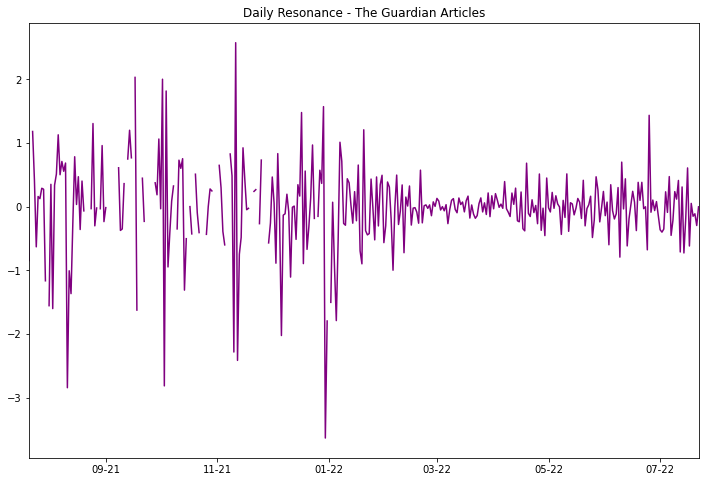

In [15]:
fig, ax = plt.subplots(figsize=(12, 8))

beginning = dt.date(2021, 7, 21)
end = dt.date.today()

ax.plot(davg.index.values,
       davg['Resonance'],
       color='purple',
       #linewidths=0
       )

ax.set(
       #xlabel="Date",
       #ylabel="Resonance",
       title="Daily Resonance - The Guardian Articles")

date_form = DateFormatter("%m-%y")
ax.xaxis.set_major_formatter(date_form)
ax.set_xbound(beginning, end)